# Neural Network Prediction of Career Batting Average

We will use a neural network to predict the career batting average based on other career stats.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
# read in the data
master_df = pd.read_csv("data/Master.csv") 
batting_df = pd.read_csv("data/Batting.csv")
batting_df

playerID  yearID  stint teamID lgID    G     AB     R     H    2B  \
0       abercda01    1871      1    TRO  NaN    1    4.0   0.0   0.0   0.0   
1        addybo01    1871      1    RC1  NaN   25  118.0  30.0  32.0   6.0   
2       allisar01    1871      1    CL1  NaN   29  137.0  28.0  40.0   4.0   
3       allisdo01    1871      1    WS3  NaN   27  133.0  28.0  44.0  10.0   
4       ansonca01    1871      1    RC1  NaN   25  120.0  29.0  39.0  11.0   
...           ...     ...    ...    ...  ...  ...    ...   ...   ...   ...   
101327   zitoba01    2015      1    OAK   AL    3    0.0   0.0   0.0   0.0   
101328  zobribe01    2015      1    OAK   AL   67  235.0  39.0  63.0  20.0   
101329  zobribe01    2015      2    KCA   AL   59  232.0  37.0  66.0  16.0   
101330  zuninmi01    2015      1    SEA   AL  112  350.0  28.0  61.0  11.0   
101331   zychto01    2015      1    SEA   AL   13    0.0   0.0   0.0   0.0   

        ...   RBI   SB   CS    BB     SO  IBB  HBP   SH   SF  GIDP  
0       ...   0.0  0.0  0.0   0.0    0.0  NaN  NaN  NaN  NaN   NaN  
1       ...  13.0  8.0  1.0   4.0    0.0  NaN  NaN  NaN  NaN   NaN  
2       ...  19.0  3.0  1.0   2.0    5.0  NaN  NaN  NaN  NaN   NaN  
3       ...  27.0  1.0  1.0   0.0    2.0  NaN  NaN  NaN  NaN   NaN  
4       ...  16.0  6.0  2.0   2.0    1.0  NaN  NaN  NaN  NaN   NaN  
...     ...   ...  ...  ...   ...    ...  ...  ...  ...  ...   ...  
101327  ...   0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  
101328  ...  33.0  1.0  1.0  33.0   26.0  2.0  0.0  0.0  3.0   5.0  
101329  ...  23.0  2.0  3.0  29.0   30.0  1.0  1.0  0.0  2.0   3.0  
101330  ...  28.0  0.0  1.0  21.0  132.0  0.0  5.0  8.0  2.0   6.0  
101331  ...   0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0   0.0  

[101332 rows x 22 columns]

In [3]:
# process data that we want to use 
batting_df2 = batting_df.drop(['yearID', 'stint', 'teamID', 'lgID'], axis=1)
batting_df2 = batting_df2.fillna(0)
batting_df2 = batting_df2.groupby(['playerID']).sum()
batting_df2 = batting_df2.loc[batting_df2['AB'] > 50] # only consider players with more than 50 ABs
batting_averages = batting_df2['H']/batting_df2['AB'] # compute the career batting averages
batting_df2.reset_index(inplace=True)
orig_data = batting_df2.copy() # save the df before dropping names to use later
batting_df2 = batting_df2.drop(['playerID','H', 'AB'], axis=1)
batting_df2

G       R     2B    3B     HR     RBI     SB    CS      BB      SO  \
0      3298  2174.0  624.0  98.0  755.0  2297.0  240.0  73.0  1402.0  1383.0   
1       437   102.0   42.0   6.0   13.0    94.0    9.0   8.0    86.0   145.0   
2       855   355.0   99.0  43.0   11.0   324.0  142.0   0.0   289.0    16.0   
3        79    21.0    3.0   3.0    0.0    17.0    3.0   0.0    21.0    54.0   
4       451   307.0   67.0  46.0   19.0   280.0   93.0   0.0   167.0   105.0   
...     ...     ...    ...   ...    ...     ...    ...   ...     ...     ...   
10022   295   101.0   36.0   2.0   38.0   102.0    1.0   4.0    54.0   339.0   
10023   319    99.0   47.0   4.0    7.0    80.0    7.0   5.0    57.0   137.0   
10024   209    41.0   17.0   2.0    2.0    20.0    2.0   0.0    34.0    50.0   
10025   266     5.0    2.0   1.0    0.0     7.0    0.0   1.0     9.0    39.0   
10026   366   167.0   76.0  15.0   30.0   202.0   46.0   0.0   128.0   139.0   

         IBB   HBP    SH     SF   GIDP  
0      293.0  32.0  21.0  121.0  328.0  
1        3.0   0.0   9.0    6.0   36.0  
2        0.0  33.0  93.0    0.0    0.0  
3        0.0   0.0   4.0    0.0    0.0  
4        0.0  23.0  18.0    0.0    0.0  
...      ...   ...   ...    ...    ...  
10022    1.0  25.0   8.0    7.0   23.0  
10023    3.0   6.0  20.0    8.0   15.0  
10024    1.0   2.0  18.0    0.0    8.0  
10025    0.0   0.0  16.0    0.0    3.0  
10026    0.0   4.0  31.0    0.0    0.0  

[10027 rows x 15 columns]

In [4]:
batting_averages = batting_averages.fillna(0)
batting_averages

playerID
aaronha01    0.304998
aaronto01    0.228814
abbated01    0.253614
abbeybe01    0.168889
abbeych01    0.280982
               ...   
zuninmi01    0.192508
zupcibo01    0.250314
zuvelpa01    0.221996
zuverge01    0.147887
zwilldu01    0.284375
Length: 10027, dtype: float64

In [5]:
# scale the batting average data
scaler = preprocessing.MinMaxScaler()
columns = batting_df2.columns
batting_scaled = pd.DataFrame(scaler.fit_transform(batting_df2))
batting_scaled.columns = columns
batting_scaled

G         R        2B        3B        HR       RBI        SB  \
0      0.925613  0.947277  0.787879  0.317152  0.990814  1.000000  0.170697   
1      0.119470  0.044444  0.053030  0.019417  0.017060  0.040923  0.006401   
2      0.237250  0.154684  0.125000  0.139159  0.014436  0.141054  0.100996   
3      0.018597  0.009150  0.003788  0.009709  0.000000  0.007401  0.002134   
4      0.123415  0.133769  0.084596  0.148867  0.024934  0.121898  0.066145   
...         ...       ...       ...       ...       ...       ...       ...   
10022  0.079459  0.044009  0.045455  0.006472  0.049869  0.044406  0.000711   
10023  0.086221  0.043137  0.059343  0.012945  0.009186  0.034828  0.004979   
10024  0.055227  0.017865  0.021465  0.006472  0.002625  0.008707  0.001422   
10025  0.071288  0.002179  0.002525  0.003236  0.000000  0.003047  0.000000   
10026  0.099465  0.072767  0.095960  0.048544  0.039370  0.087941  0.032717   

             CS        BB        SO       IBB       HBP        SH        SF  \
0      0.217910  0.548084  0.532538  0.425872  0.111498  0.041016  0.945312   
1      0.023881  0.033620  0.055834  0.004360  0.000000  0.017578  0.046875   
2      0.000000  0.112979  0.006161  0.000000  0.114983  0.181641  0.000000   
3      0.000000  0.008210  0.020793  0.000000  0.000000  0.007812  0.000000   
4      0.000000  0.065285  0.040431  0.000000  0.080139  0.035156  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
10022  0.011940  0.021110  0.130535  0.001453  0.087108  0.015625  0.054688   
10023  0.014925  0.022283  0.052753  0.004360  0.020906  0.039062  0.062500   
10024  0.000000  0.013292  0.019253  0.001453  0.006969  0.035156  0.000000   
10025  0.002985  0.003518  0.015017  0.000000  0.000000  0.031250  0.000000   
10026  0.000000  0.050039  0.053523  0.000000  0.013937  0.060547  0.000000   

           GIDP  
0      0.937143  
1      0.102857  
2      0.000000  
3      0.000000  
4      0.000000  
...         ...  
10022  0.065714  
10023  0.042857  
10024  0.022857  
10025  0.008571  
10026  0.000000  

[10027 rows x 15 columns]

## Visualize the Data

Run UMAP on the data so that we can get a good visual.

In [6]:
import umap.umap_ as umap
import plotly.express as px

In [7]:
# neighbors = int(batting_scaled.shape[0] * 0.2) # use % of data for n_neighbors
fit = umap.UMAP(metric='euclidean', random_state=42)
%time vis = fit.fit_transform(batting_scaled)
vis = pd.DataFrame({
    'x': vis[:,0],
    'y': vis[:,1],
    'BA': batting_averages})
vis

CPU times: user 17 s, sys: 347 ms, total: 17.3 s
Wall time: 16.2 s


x         y        BA
playerID                                
aaronha01  12.940384 -3.176063  0.304998
aaronto01   5.745255  4.493549  0.228814
abbated01  10.905856  4.522225  0.253614
abbeybe01  -1.341880  0.392880  0.168889
abbeych01   5.196206  0.884018  0.280982
...              ...       ...       ...
zuninmi01   5.850629  5.036226  0.192508
zupcibo01   4.637235  5.008527  0.250314
zuvelpa01   0.984646  2.928454  0.221996
zuverge01  -1.761991  6.959002  0.147887
zwilldu01   4.724473  1.869632  0.284375

[10027 rows x 3 columns]

In [8]:
fig = px.scatter(vis, x='x', y='y', color='BA', hover_data=vis)
fig.show()

So we can see that the batting average is spread out around the dataset. One of the tails of the resulting figure shows how the higher batting averages are closer together. The UMAP parameters can be tuned and changed to make the visual a little bit better.

## Evaluate a Baseline

We will evaluate a baseline by guessing the average for all players.

In [9]:
avg_ba = batting_averages.mean()
avg_ba

0.22394442312491677

In [41]:
sum(abs(batting_averages - avg_ba))/len(batting_averages)

0.04341239825954507

So the mean error for just guessing the average of all players is around 0.04.

## Create a Model

In [58]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(batting_scaled, batting_averages, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))
print((X_val.shape, y_val.shape))

((6016, 15), (6016,))
((2006, 15), (2006,))
((2005, 15), (2005,))


In [90]:
# create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(128, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(128, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(128, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(128, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear', dtype='float64')
])

In [91]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [92]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=125);

Epoch 1/125
188/188 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0377 - val_loss: 0.0011 - val_mean_absolute_error: 0.0254
Epoch 2/125
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_absolute_error: 0.0234 - val_loss: 8.9949e-04 - val_mean_absolute_error: 0.0224
Epoch 3/125
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_absolute_error: 0.0236 - val_loss: 8.5819e-04 - val_mean_absolute_error: 0.0215
Epoch 4/125
188/188 [==============================] - 0s 2ms/step - loss: 8.6202e-04 - mean_absolute_error: 0.0213 - val_loss: 0.0013 - val_mean_absolute_error: 0.0285
Epoch 5/125
188/188 [==============================] - 0s 2ms/step - loss: 8.8699e-04 - mean_absolute_error: 0.0219 - val_loss: 9.7399e-04 - val_mean_absolute_error: 0.0232
Epoch 6/125
188/188 [==============================] - 0s 2ms/step - loss: 8.5824e-04 - mean_absolute_error: 0.0214 - val_loss: 9.0525e-04 - val_mean_absol

188/188 [==============================] - 0s 2ms/step - loss: 5.9925e-04 - mean_absolute_error: 0.0173 - val_loss: 6.6141e-04 - val_mean_absolute_error: 0.0186
Epoch 96/125
188/188 [==============================] - 0s 2ms/step - loss: 5.8404e-04 - mean_absolute_error: 0.0171 - val_loss: 6.5758e-04 - val_mean_absolute_error: 0.0187
Epoch 97/125
188/188 [==============================] - 0s 2ms/step - loss: 5.8289e-04 - mean_absolute_error: 0.0171 - val_loss: 6.5768e-04 - val_mean_absolute_error: 0.0190
Epoch 98/125
188/188 [==============================] - 0s 2ms/step - loss: 5.9657e-04 - mean_absolute_error: 0.0174 - val_loss: 6.1720e-04 - val_mean_absolute_error: 0.0182
Epoch 99/125
188/188 [==============================] - 0s 2ms/step - loss: 5.9477e-04 - mean_absolute_error: 0.0173 - val_loss: 6.2088e-04 - val_mean_absolute_error: 0.0182
Epoch 100/125
188/188 [==============================] - 0s 2ms/step - loss: 5.9998e-04 - mean_absolute_error: 0.0173 - val_loss: 6.9994e-04 - 

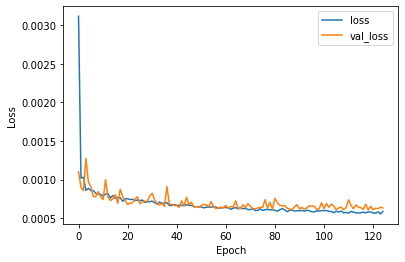

In [93]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [94]:
loss, mae = model.evaluate(X_test, y_test)
mae

63/63 [==============================] - 0s 1ms/step - loss: 5.9925e-04 - mean_absolute_error: 0.0176


0.01760639250278473

So we have a MAE of less than 0.02, which is an improvement over simply guessing where we had a MAE of about 0.04.

## Interpreting the Predictions

We will use the shap library in order to interpret our data. Shap makes use of the Shapely values from game theory in order to explain the predictions for a certain player. We will make use of the Kernel Explainer which can be used on any method to compute those Shapely values. A good visualization for this is the force plot which is provided in the shap library.

In [95]:
import shap
shap.initjs()

In [96]:
X_test

G         R        2B        3B        HR       RBI        SB  \
9573  0.182305  0.003486  0.002525  0.000000  0.000000  0.002177  0.000000   
3033  0.015779  0.012200  0.011364  0.009709  0.001312  0.008707  0.002134   
6264  0.010144  0.003922  0.002525  0.000000  0.000000  0.001741  0.000000   
6603  0.195266  0.023965  0.032828  0.003236  0.001312  0.031345  0.000711   
6723  0.070442  0.006972  0.003788  0.000000  0.003937  0.004789  0.000711   
...        ...       ...       ...       ...       ...       ...       ...   
9912  0.063680  0.052723  0.031566  0.064725  0.006562  0.050936  0.012802   
1570  0.030431  0.003486  0.002525  0.000000  0.000000  0.003918  0.000000   
2358  0.053536  0.013072  0.012626  0.000000  0.000000  0.014802  0.000000   
4826  0.227106  0.127233  0.136364  0.084142  0.039370  0.095342  0.032006   
4333  0.278107  0.217865  0.184343  0.090615  0.032808  0.104919  0.184922   

            CS        BB        SO       IBB       HBP        SH        SF  \
9573  0.000000  0.001173  0.022719  0.000000  0.003484  0.035156  0.000000   
3033  0.000000  0.003518  0.002310  0.000000  0.000000  0.011719  0.000000   
6264  0.000000  0.005082  0.003851  0.000000  0.000000  0.001953  0.000000   
6603  0.000000  0.014855  0.100886  0.000000  0.003484  0.287109  0.046875   
6723  0.000000  0.001955  0.025799  0.000000  0.000000  0.033203  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
9912  0.000000  0.017983  0.000385  0.000000  0.003484  0.041016  0.000000   
1570  0.000000  0.001955  0.012322  0.000000  0.000000  0.029297  0.000000   
2358  0.002985  0.002346  0.026954  0.000000  0.003484  0.058594  0.031250   
4826  0.083582  0.074668  0.095495  0.013081  0.024390  0.037109  0.179688   
4333  0.182090  0.094996  0.223720  0.001453  0.045296  0.052734  0.226562   

          GIDP  
9573  0.002857  
3033  0.000000  
6264  0.000000  
6603  0.048571  
6723  0.002857  
...        ...  
9912  0.000000  
1570  0.008571  
2358  0.020000  
4826  0.102857  
4333  0.131429  

[2006 rows x 15 columns]

In [97]:
player = X_test.index[2] # index of player that we want to look up in the test set
explainer = shap.KernelExplainer(lambda x: model.predict(x).flatten(), X_train[:100])
shap_values = explainer.shap_values(pd.DataFrame(X_test.loc[player]).T)
shap.force_plot(explainer.expected_value, shap_values, X_test.loc[player])

In [98]:
model.predict(pd.DataFrame(X_test.loc[player]).T)

array([[0.19304904]])

In [99]:
tested_player = orig_data.loc[X_test.loc[player].name]
tested_player['H']/tested_player['AB']

0.20689655172413793

In [100]:
tested_player

playerID    moorebi02
G                  49
AB                 87
R                   9
H                  18
2B                  2
3B                  0
HR                  0
RBI                 4
SB                  0
CS                  0
BB                 13
SO                 10
IBB                 0
HBP                 0
SH                  1
SF                  0
GIDP                0
Name: 6264, dtype: object